338.75906
107 106


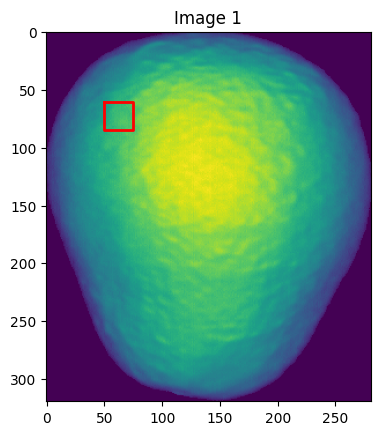

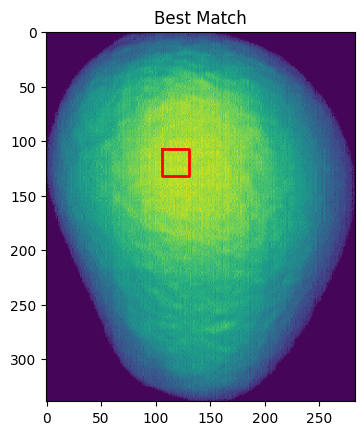

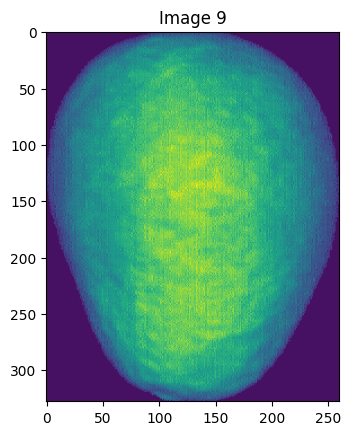

In [43]:
import spectral.io.envi as envi
import spectral
import cv2
import numpy as np
from scipy.signal import correlate2d
# path for the day 1 dataset
day1_hdrFile = "/home/sayan/ce301/avocado/day_1/avocado_day_01_01_front.hdr"
day1_BinFile = "/home/sayan/ce301/avocado/day_1/avocado_day_01_01_front.bin"

day2_hdrFile =  "/home/sayan/ce301/avocado/day_2/avocado_day_02_01_front.hdr"
day2_BinFile =  "/home/sayan/ce301/avocado/day_2/avocado_day_02_01_front.bin"

day9hdr = "avocado/day_9/avocado_day_09_01_front.hdr"
day9bin = "avocado/day_9/avocado_day_09_01_front.bin"

# using envi to import and read data
imgDay1 = envi.open(day1_hdrFile, day1_BinFile).load()
imgDay2 = envi.open(day2_hdrFile, day2_BinFile).load()
imgDay9 = envi.open(day9hdr, day9bin).load()
# Select the first band
first_Image = imgDay1.read_band(200)
second_image = imgDay2.read_band(200)
ninth_image = imgDay9.read_band(200)



REGx = 60
REGy = 50

regionSize = 25

Image1Region = first_Image[REGx:REGx+regionSize, REGy:REGy + regionSize]

bestMatch = 0
bestLoction = None

#reding rows and colowing and iterating through the image 2
for x in range(second_image.shape[0] - regionSize ):
    for y in range(second_image.shape[1] - regionSize ):
        Image2Region = second_image[x:x + regionSize, y:y + regionSize]
        
        # Calculating the cross corraltion
        Corraltion = correlate2d(Image1Region, Image2Region, mode='valid')[0, 0]
        # updating the best corration
        if Corraltion > bestMatch:
            bestMatch = Corraltion
            bestLoction = (x, y)
            
print(bestMatch)
print(bestLoction[0], bestLoction[1])
import matplotlib.pyplot as plt


plt.imshow(first_Image )
plt.plot([REGy, REGy+ regionSize, REGy + regionSize, REGy, REGy],
         [REGx, REGx, REGx +regionSize, REGx +regionSize, REGx],
         'r-', linewidth=2)
plt.title('Image 1')
plt.show()

plt.imshow(second_image)
plt.plot([bestLoction[1], bestLoction[1] + regionSize, bestLoction[1] + regionSize, bestLoction[1], bestLoction[1]],
         [bestLoction[0], bestLoction[0], bestLoction[0] +regionSize, bestLoction[0] +regionSize, bestLoction[0]],
         'r-', linewidth=2)
plt.title('Best Match')
plt.show()

plt.imshow(ninth_image)
plt.title('Image 9')
plt.show()

#img = cv2.imshow("img",first_Image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
